# 作业6：图像的线性与非线性空间滤波  

## 作业目的：理解图像空间滤波的实现步骤，掌握平滑、锐化两类空间滤波的区别，了解线性与非线性滤波差别


## 作业内容：

（1）参考链接的中文文献，学习浮雕效果的实现原理（线性滤波），用PYTHON实现浮雕效果。


图像空间滤波

 skimage的filters模块提供了常见的滤波函数，能用于图像的空间滤波。

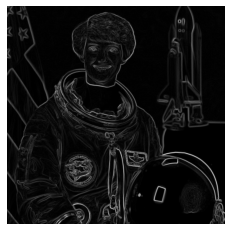

In [26]:
from skimage import data,filters
import matplotlib.pyplot as plt
import numpy as np


img = data.astronaut()

#RBG 转化为灰度图像
imgGray=np.zeros((img.shape[0], img.shape[1]), dtype=int)
for r in range(img.shape[0]):
    for l in range(img.shape[1]):
        imgGray[r, l] = 0.11 * img[r, l, 0] + 0.59 * img[r, l, 1] + 0.3 * img[r, l, 2]

edges = filters.sobel(imgGray)

plt.axis('off')
plt.imshow(edges,plt.cm.gray)

plt.show()


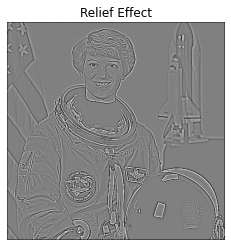

In [27]:

import numpy as np
 
img=data.astronaut()

height,width,channelNum=img.shape

#RBG 图像转化为灰度图像

# 加权平均法 
#I(x,y) = 0.3 * I_R(x,y) +0.59 * I_G(x,y)+ 0.11 * I_B(x,y) 
#这是最流行的方法。几个加权系数0.3,0.59,0.11是根据人的亮度感知系统调节出来的参数，是个广泛使用的标准化参数。

imgGray=np.zeros((img.shape[0], img.shape[1]), dtype=int)
for r in range(img.shape[0]):
    for l in range(img.shape[1]):
        imgGray[r, l] = 0.11 * img[r, l, 0] + 0.59 * img[r, l, 1] + 0.3 * img[r, l, 2]




plt.imshow(imgGray,plt.cm.gray)

reliefImg=np.zeros((height,width),dtype=int)
 
for i in range(1,height-1):
    for j in range(1,width-1):
        p0 = int(imgGray[i,j])
        p1 = int(imgGray[i-1,j-1])
        p2 = int(imgGray[i + 1, j - 1])
        p3 = int(imgGray[i+1,j+1])
        p4 = int(imgGray[i-1,j+1])
        newP = p0*4 - p1 -p2-p3-p4 + 128
        if newP > 255:
            newP = 255
        elif newP < 0:
            newP = 0
        else:
            pass
        reliefImg[i, j] = newP

plt.title("Relief Effect")

plt.axis("off")
plt.imshow(reliefImg,plt.cm.gray)


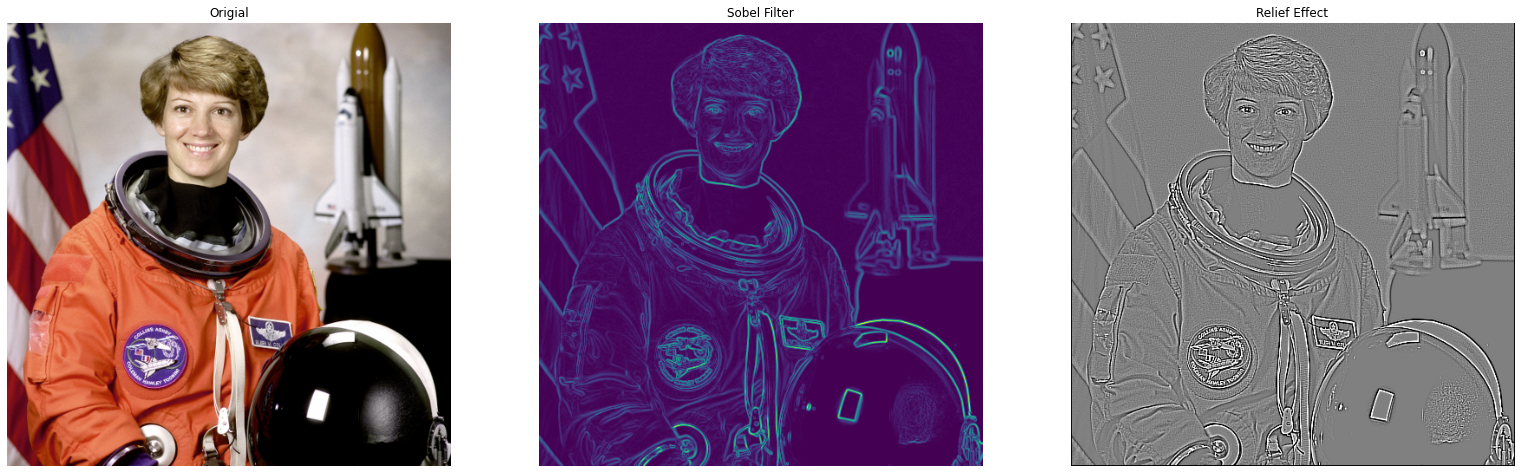

In [28]:
plt.figure(figsize=(27,14))
plt.subplot(131)
plt.imshow(img,plt.cm.gray)
plt.axis('off')
plt.title('Origial')
plt.subplot(132)
plt.imshow(edges)
plt.axis('off')
plt.title('Sobel Filter')
plt.subplot(133)
plt.imshow(reliefImg,plt.cm.gray)
plt.axis('off')
plt.title('Relief Effect')

plt.show()

###  1.源代码解释 

        sobel算法对当前列左右两侧的元素进行差分，由于边缘的值明显小于（或大于）周边像素，所以边缘的差分结果会明显不同，这样就提取出了垂直边缘。同理，把上面那个矩阵转置一下，就是提取水平边缘。
        
        Relief Effect 效果是将我们的sobel的计算出的值进行整体加上128，其次的是在运算的计算算法（ newP = p0*4 - p1 -p2-p3-p4 + 128 ）上与sobel略有不同，但是同样的实现了相同的效果。 

（2）参考链接的英文文献，学习油画效果的实现原理（非线性滤波），用PYTHON实现彩色图像的油画效果
雕效果？
                  

In [29]:
from skimage import data,io
import numpy as np 
import copy

def PaintEffect(data,nRadius_i:int,fIntensityLevels_i:int ,nWidth_i:int , nHeight_i:int,stepNum):
    nIntensityCount=[0 for i in range(0,fIntensityLevels_i+1)]
    nSumR=[0 for i in range(0,int(fIntensityLevels_i))]
    nSumG=[0 for i in range(0,int(fIntensityLevels_i))]
    nSumB=[0 for i in range(0,int(fIntensityLevels_i))]

    # data_Out=copy.deepcopy(data)
    data_Out=np.zeros((nHeight_i,nWidth_i,3),dtype=np.int16)

    step=stepNum


    # nRadius pixels are avoided from left, right top, and bottom edges.
    for nY in range(nRadius_i,nHeight_i - nRadius_i):
        for nX in range(nRadius_i,nWidth_i - nRadius_i,step):
            # Find intensities of nearest nRadius pixels in four direction.
            for nY_O in range(-nRadius_i,nRadius_i+1):
                for nX_O in range(-nRadius_i,nRadius_i+1):

                    nR = data[int(nX+nX_O),int(nY + nY_O) ,0]

                    nG = data[int(nX+nX_O),int(nY + nY_O) ,1]

                    nB = data[int(nX+nX_O),int(nY + nY_O) ,2]
                    # Find intensity of RGB value and apply intensity level.
                    nCurIntensity =  (( ( ( nR + nG + nB ) / 3.0 ) * fIntensityLevels_i ) / 255)

                    if nCurIntensity > 255 :
                        nCurIntensity = 255
                    i = int(round(nCurIntensity))

                    nIntensityCount[i]+=1
                    nSumR[i] = nSumR[i] + nR
                    nSumG[i] = nSumG[i] + nG
                    nSumB[i] = nSumB[i] + nB
                  

            nCurMax = 0
            nMaxIndex = 0
            for nI in range(0,fIntensityLevels_i+1):
                if nIntensityCount[nI] > nCurMax:
                    nCurMax = nIntensityCount[nI]
                    nMaxIndex = nI
            R=int(nSumR[nMaxIndex] / nCurMax)
            G=int(nSumG[nMaxIndex] / nCurMax)
            B=int(nSumB[nMaxIndex] / nCurMax)

            for nY_O in range(-nRadius_i,nRadius_i+1):
                for nX_O in range(-nRadius_i,nRadius_i+1):    
                    data_Out[int(nX+nX_O),int(nY + nY_O) ,0]=R
                    data_Out[int(nX+nX_O),int(nY + nY_O) ,1]=G
                    data_Out[int(nX+nX_O),int(nY + nY_O) ,2]=B
            nIntensityCount=[int(0) for i in range(0,fIntensityLevels_i+1)]

            nSumR=[0 for i in range(0,int(fIntensityLevels_i))]
            nSumG=[0 for i in range(0,int(fIntensityLevels_i))]
            nSumB=[0 for i in range(0,int(fIntensityLevels_i))]
            

             
    return data_Out



data=io.imread('./lena.png')
print(data.shape)
transImgStep2=PaintEffect(data,2,20,data.shape[1],data.shape[0],2)
transImgStep3=PaintEffect(data,2,20,data.shape[1],data.shape[0],3)
transImgStep4=PaintEffect(data,2,10,data.shape[1],data.shape[0],2)

(512, 512, 3)


Text(0.5, 1.0, '2 Step, 10 fIntensity')

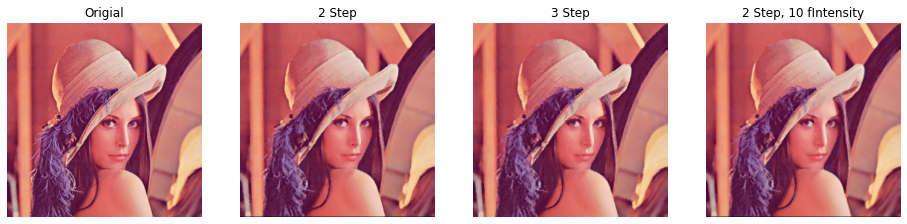

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(141)
plt.imshow(data)
plt.axis('off')
plt.title('Origial')
plt.subplot(142)
plt.imshow(transImgStep2)
plt.axis('off')
plt.title('2 Step')
plt.subplot(143)
plt.imshow(transImgStep3)
plt.axis('off')
plt.title('3 Step')
plt.subplot(144)
plt.imshow(transImgStep4)
plt.axis('off')
plt.title('2 Step, 10 fIntensity')

###  2.源代码解释   

        对源代码的理解以及转化成Python代码的总结和反思：

                经过参考链接（2）的理解后我虽然明白了原理是如何实现的，简单的说就是讲我们的图像进行模糊化，通过对X*X方格离散化后得到强度区间并统计在这个正方形的方格内某个颜色的强度在这个小方块中数量最多。然后将这个区间的颜色进行相加然后除上这个强度的数量，得到平均值，然后得到这个中心像素的RGB值，在通过一层层的遍历，我们就实现了油画效果。

参考链接：

        （1）浮雕实现的原理，http://www.docin.com/p-454207498.html

        （2）油画效果的实现原理，http://www.codeproject.com/Articles/471994/OilPaintEffect ，只需要阅读原理部分


提交内容：

    （1）PDF格式的报告

    （2）浮雕效果的图像处理原理描述及效果对比，给出相应的源代码并进行解释

    （3）油画效果的图像处理原理描述及效果对比，给出相应的源代码并进行解释

扩展内容：

    PHOTOSHOP在实现浮雕效果时可以选择方向，常见的算法只能实现8个方向，如何实现任意方向的浮雕效果？

    计算任意方向的边缘可以参考 http://www.docin.com/p-1292448965.html